<a href="https://colab.research.google.com/github/dpshepherd/PHY333_S2021/blob/main/Nonlinear_Least_Squares_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear least squares fitting in python using lmfit
  
[Manual for lmfit](https://lmfit.github.io/lmfit-py/index.html)



### Install [lmfit](https://lmfit.github.io/lmfit-py/) python library

In [3]:
!pip install lmfit

     |████████████████████████████████| 292 kB 5.1 MB/s 
     |████████████████████████████████| 98 kB 6.5 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84401 sha256=08ec3b951f8f7cd192d5ab0abe4664e5bfbcd41ca96432c3f6bce85904995c12
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=775b727a577898a191101f46cfea61d86e6c676d0853998a1ae3b52ea30b3196
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


### Import relevant functions from [numpy](https://numpy.org/), [lmfit](https://lmfit.github.io/lmfit-py/), and [matplotlib](https://matplotlib.org/) python libraries


In [146]:
from numpy import exp, sin, linspace, random, round
from lmfit import minimize, Parameters
import matplotlib as mpl
import matplotlib.pyplot as plt

### Simulate decaying expontential signal

In [147]:
# function to generate decaying signal
def decaying_signal(x,amplitude,frequency,phase,decay,noise=None):

  # generate noisy (true) or clean (false) signal
  if noise:
    signal_data = amplitude * sin(x*frequency + phase) * exp(-x*x*decay) + noise
  else:
    signal_data = amplitude * sin(x*frequency + phase) * exp(-x*x*decay)

  return signal_data

# generate independent axis variable
x = linspace(0, 100)

# generate noise
noise = random.normal(size=x.size, scale=.2)

# set ground truth values
amplitude_truth = 7.5
frequency_truth = 0.22
phase_truth = 2.5
decay_truth = 0.001

# create strings of parameter values for output
amplitude_truth_string = str(round(amplitude_truth,2))
frequency_truth_string = str(round(frequency_truth,2))
phase_truth_string = str(round(phase_truth,2))
decay_truth_string = str(round(decay_truth,4))

# generate signal
data = decaying_signal(x,amplitude_truth,frequency_truth,phase_truth,decay_truth)

# generate experimental uncertainties
uncertainty = abs(0.2 + random.normal(size=x.size, scale=0.05))

### Plot simulated data

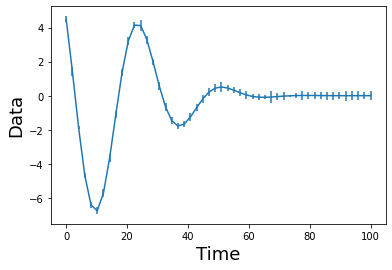

In [148]:
plt.errorbar(x=x,y=data,xerr=None,yerr=uncertainty)
plt.ylabel('Data', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.show()

### Create function to fit  data and perform NLLS parameter optimization

In [149]:
# residual is the function that calculates the model value for the given parameters and returns the difference at each point
def residual(params, x, data, uncertainty):
    amp = params['amp']
    phaseshift = params['phase']
    freq = params['frequency']
    decay = params['decay']

    model = amp * sin(x*freq + phaseshift) * exp(-x*x*decay)

    return (data-model) / uncertainty

# declare the parameters and bounds for the model
params = Parameters()
params.add('amp', value=10)
params.add('frequency', value=1.0, max=10)
params.add('phase', value=0.2)
params.add('decay', value=0.007, min=0.0)

# extracted initial parameters
amplitude_initial = params['amp'].value
frequency_initial = params['frequency'].value
phase_initial = params['phase'].value
decay_initial = params['decay'].value

# estimate parameter fits
out = minimize(residual, params, args=(x, data, uncertainty))

# extracted estimated parameters
amplitude_fit = out.params['amp'].value
frequency_fit = out.params['frequency'].value
phase_fit = out.params['phase'].value
decay_fit = out.params['decay'].value

# create strings of fit parameters values
amplitude_fit_string = str(round(amplitude_fit,2))
frequency_fit_string = str(round(frequency_fit,2))
phase_fit_string = str(round(phase_fit,2))
decay_fit_string = str(round(decay_fit,4))

### Print output of fitting

In [150]:
print('amplitude (truth):' + amplitude_truth_string +'; amplitude (fit):' + amplitude_fit_string)
print('decay (truth):' + decay_truth_string +'; decay (fit):' + decay_fit_string)
print('phase (truth):' + phase_truth_string +'; phase (fit):' + phase_fit_string)
print('frequency (truth):' + frequency_truth_string +'; frequency (fit):' + frequency_fit_string)

amplitude (truth):7.5; amplitude (fit):7.5
decay (truth):0.001; decay (fit):0.001
phase (truth):2.5; phase (fit):2.5
frequency (truth):0.22; frequency (fit):0.22


### Plot fit and ground truth

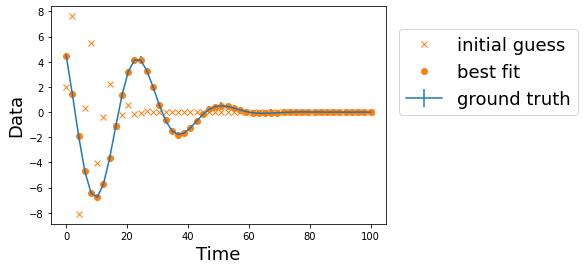

In [151]:
# calculate function using initial fit parameters
initial_data = decaying_signal(x,amplitude_initial,frequency_initial,phase_initial,decay_initial)

# calculate function using best fit parameters
predicted_data = decaying_signal(x,amplitude_fit,frequency_fit,phase_fit,decay_fit)

# plot ground truth (blue line), initial fit parameters (orange X), and final fit parameters (orange dots)
plt.errorbar(x=x,y=data,xerr=None,yerr=uncertainty,label='ground truth',color='tab:blue')
plt.plot(x, initial_data, 'x', label='initial guess',color='tab:orange')
plt.plot(x, predicted_data, 'o', label='best fit',color='tab:orange')
plt.ylabel('Data', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(loc=(1.04,.5),fontsize=18)
plt.show()